In [105]:
import json

# Access JSON file with connection string

with open('G:\\My Drive\\School\\DATA 320\\readonly-credentials.json') as f:
    # Load the JSON data from the file.
    data = json.load(f)

    # Extract the readonly_key from the JSON data.
    readonly_key = data['readonly_key']


import pymongo
import certifi

# Connect to MongoDB Database with string.
mongo_connection_string = data['readonly_key']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

da485_database = client['DATA485']

allCollections = da485_database.list_collection_names()

# Verify database version and collection.
print(f"This database has the collections {allCollections}")



This database has the collections ['NFL_STATS']


In [106]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da485_database["NFL_STATS"].find()

# Convert this information into a Pandas dataframe.
scoring_stats = pd.DataFrame(cursor)

# Make sure we've read the information correctly.
scoring_stats.head()

import pandas

# Access the 'imdb' collection.
cursor = da485_database['NFL_STATS'].find()

# Create a Pandas DataFrame using the data retrieved.
scoring_stats = pd.DataFrame(cursor)

# Preview Dataframe.
scoring_stats.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _id     2389 non-null   object 
 1   Season  2389 non-null   int64  
 2   Player  2389 non-null   object 
 3   Age     2389 non-null   float64
 4   Pos     2389 non-null   object 
 5   G       2389 non-null   int64  
 6   GS      2389 non-null   float64
 7   RshTD   2389 non-null   float64
 8   RecTD   2389 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 168.1+ KB


In [107]:
scoring_stats.head()

,_id,Season,Player,Age,Pos,G,GS,RshTD,RecTD
0,653487058d3b56d4877c97fc,1926,Eddie Kotal,24.0,HB,10,5.0,1.0,1.0
1,653487058d3b56d4877c97fd,1934,Joe Laws,23.0,HB,13,7.0,1.0,1.0
2,653487058d3b56d4877c97fe,1940,Lou Tomasetti,24.0,HB,10,9.0,1.0,1.0
3,653487058d3b56d4877c97ff,1943,Merl Condit,26.0,HB,8,7.0,1.0,1.0
4,653487058d3b56d4877c9800,1950,Fred Gehrke,32.0,HB,11,1.0,1.0,1.0


In [108]:
scoring_stats.tail()

,_id,Season,Player,Age,Pos,G,GS,RshTD,RecTD
2384,653487078d3b56d4877cae44,1994,Emmitt Smith,25.0,RB,15,15.0,21.0,1.0
2385,653487078d3b56d4877cae45,1998,Terrell Davis,26.0,RB,16,16.0,21.0,2.0
2386,653487078d3b56d4877cae46,2002,Priest Holmes,29.0,RB,14,14.0,21.0,3.0
2387,653487078d3b56d4877cae4b,2005,Shaun Alexander,28.0,RB,16,16.0,27.0,1.0
2388,653487078d3b56d4877cae4d,2006,LaDainian Tomlinson,27.0,RB,16,16.0,28.0,3.0


In [109]:
scoring_stats.budget = pd.to_numeric(scoring_stats.Age, errors='coerce')
scoring_stats.runtime = pd.to_numeric(scoring_stats.G, errors='coerce')
scoring_stats.budget = pd.to_numeric(scoring_stats.GS, errors='coerce')
scoring_stats.runtime = pd.to_numeric(scoring_stats.RshTD, errors='coerce')
scoring_stats.budget = pd.to_numeric(scoring_stats.RecTD, errors='coerce')
scoring_stats.runtime = pd.to_datetime(scoring_stats.Season, errors='coerce')


scoring_stats.head()


C:\Users\cvoko\AppData\Local\Temp\ipykernel_39452\3446427543.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  scoring_stats.budget = pd.to_numeric(scoring_stats.Age, errors='coerce')
C:\Users\cvoko\AppData\Local\Temp\ipykernel_39452\3446427543.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  scoring_stats.runtime = pd.to_numeric(scoring_stats.G, errors='coerce')


,_id,Season,Player,Age,Pos,G,GS,RshTD,RecTD
0,653487058d3b56d4877c97fc,1926,Eddie Kotal,24.0,HB,10,5.0,1.0,1.0
1,653487058d3b56d4877c97fd,1934,Joe Laws,23.0,HB,13,7.0,1.0,1.0
2,653487058d3b56d4877c97fe,1940,Lou Tomasetti,24.0,HB,10,9.0,1.0,1.0
3,653487058d3b56d4877c97ff,1943,Merl Condit,26.0,HB,8,7.0,1.0,1.0
4,653487058d3b56d4877c9800,1950,Fred Gehrke,32.0,HB,11,1.0,1.0,1.0


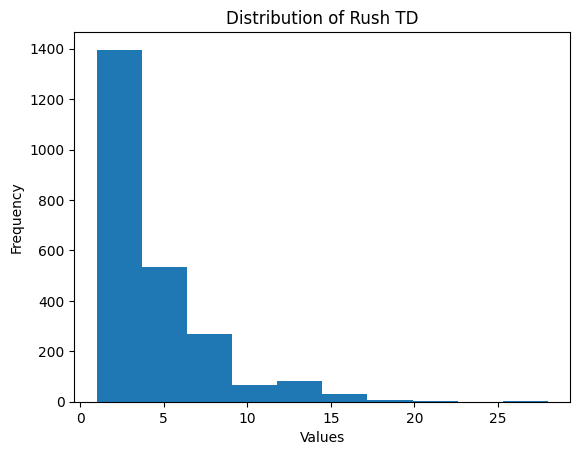

In [110]:
scoring_stats.dropna(inplace=True)

import matplotlib.pyplot as plt
scoring_stats['RshTD'].plot(kind='hist')
plt.title('Distribution of Rush TD')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

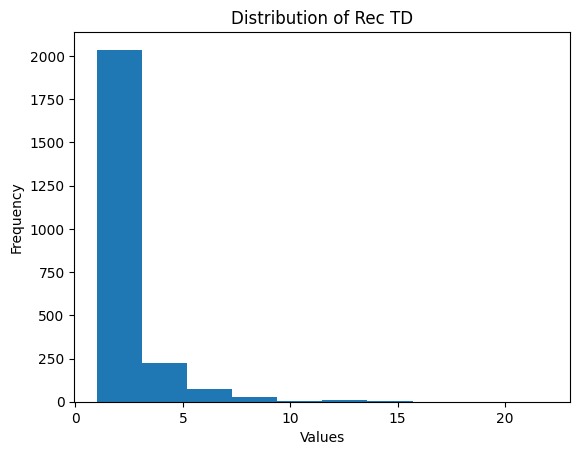

In [111]:
scoring_stats.dropna(inplace=True)

import matplotlib.pyplot as plt
scoring_stats['RecTD'].plot(kind='hist')
plt.title('Distribution of Rec TD')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [112]:
scoring_stats.to_csv('cleaned_data.csv', index=False)

In [128]:

# Group by season and calculate totals
grouped_season = scoring_stats.groupby(["Season"]).agg({
    "G": "sum",
    "GS": "sum",
    "RshTD": "sum",
    "RecTD": "sum"
}).reset_index()


sorted_RecTD = grouped_season.sort_values(by="RecTD", ascending=False)
sorted_RshTD = grouped_season.sort_values(by="RshTD", ascending=False)

grouped_season.to_csv('cleaned_season.csv', index=False)
grouped_season.dropna(inplace=True)

print(sorted_RecTD)
print()
print(sorted_RshTD)

     Season    G     GS  RshTD  RecTD
96     2018  694  452.0  235.0  164.0
100    2022  879  495.0  192.0  146.0
99     2021  840  467.0  239.0  144.0
98     2020  780  435.0  225.0  144.0
97     2019  721  412.0  228.0  134.0
..      ...  ...    ...    ...    ...
15     1937   43   38.0   13.0    6.0
2      1924   45   41.0   14.0    5.0
13     1935   34   17.0    8.0    4.0
14     1936   31   19.0    8.0    4.0
16     1938   43   36.0    9.0    4.0

[101 rows x 5 columns]

    Season    G     GS  RshTD  RecTD
99    2021  840  467.0  239.0  144.0
96    2018  694  452.0  235.0  164.0
94    2016  750  402.0  230.0  110.0
97    2019  721  412.0  228.0  134.0
98    2020  780  435.0  225.0  144.0
..     ...  ...    ...    ...    ...
18    1940   72   54.0    9.0   11.0
14    1936   31   19.0    8.0    4.0
13    1935   34   17.0    8.0    4.0
11    1933   35   32.0    7.0    7.0
17    1939   51   33.0    7.0    7.0

[101 rows x 5 columns]


In [131]:

# Group by position and calculate totals
grouped_pos = scoring_stats.groupby(["Pos"]).agg({
    "G": "sum",
    "GS": "sum",
    "RshTD": "sum",
    "RecTD": "sum"
}).reset_index()

sorted_RecTD = grouped_pos.sort_values(by="RecTD", ascending=False)
sorted_RshTD = grouped_pos.sort_values(by="RshTD", ascending=False)

grouped_pos.to_csv('cleaned_pos.csv', index=False)
grouped_pos.dropna(inplace=True)

print(sorted_RecTD)
print()
print(sorted_RshTD)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     29 non-null     object 
 1   G       29 non-null     int64  
 2   GS      29 non-null     float64
 3   RshTD   29 non-null     float64
 4   RecTD   29 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [115]:
# Total Scores

total_RshTD = sorted_RshTD["RshTD"].sum()
total_RecTD = sorted_RecTD["RecTD"].sum()

print(f"Total RshTD: {total_RshTD}")
print(f"Total RecTD: {total_RecTD}")


Total RshTD: 9525.0
Total RecTD: 5188.0


In [130]:

# Group by position and calculate totals
grouped_age = scoring_stats.groupby(["Age"]).agg({
    "G": "sum",
    "GS": "sum",
    "RshTD": "sum",
    "RecTD": "sum"
}).reset_index()


sorted_RecTD = grouped_age.sort_values(by="RecTD", ascending=False)
sorted_RshTD = grouped_age.sort_values(by="RshTD", ascending=False)

grouped_age.to_csv('cleaned_age.csv', index=False)
grouped_age.dropna(inplace=True)

print(sorted_RecTD)
print()
print(sorted_RshTD)

     Age     G      GS   RshTD  RecTD
5   25.0  4652  2929.0  1402.0  788.0
4   24.0  4968  2739.0  1402.0  725.0
6   26.0  4272  2843.0  1334.0  691.0
7   27.0  3624  2493.0  1091.0  612.0
3   23.0  4053  2247.0  1163.0  605.0
8   28.0  2663  1783.0   756.0  455.0
2   22.0  2438  1358.0   723.0  370.0
9   29.0  2055  1399.0   607.0  311.0
10  30.0  1401   875.0   415.0  221.0
11  31.0   819   575.0   232.0  148.0
12  32.0   609   339.0   143.0  100.0
1   21.0   499   262.0   170.0   73.0
13  33.0   280   167.0    58.0   48.0
14  34.0   132    72.0    20.0   27.0
16  36.0    30    18.0     2.0    6.0
15  35.0    34     5.0     6.0    4.0
0   20.0    10     7.0     1.0    4.0

     Age     G      GS   RshTD  RecTD
4   24.0  4968  2739.0  1402.0  725.0
5   25.0  4652  2929.0  1402.0  788.0
6   26.0  4272  2843.0  1334.0  691.0
3   23.0  4053  2247.0  1163.0  605.0
7   27.0  3624  2493.0  1091.0  612.0
8   28.0  2663  1783.0   756.0  455.0
2   22.0  2438  1358.0   723.0  370.0
9   29.0  2

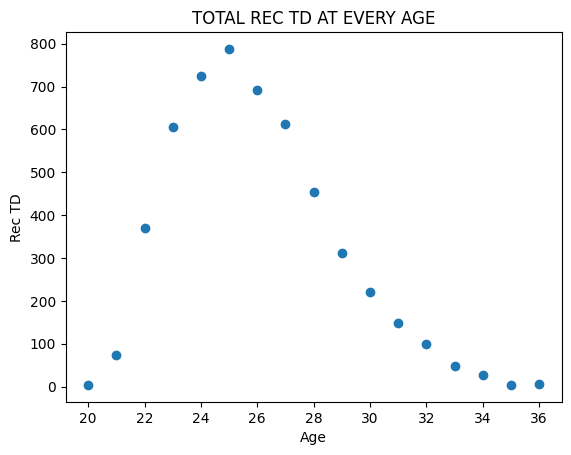

In [117]:
from matplotlib import pyplot

# Plot runtimes in a scatterplot.
pyplot.title('TOTAL REC TD AT EVERY AGE')
pyplot.xlabel('Age')
pyplot.ylabel('Rec TD')
pyplot.scatter(grouped_age['Age'], grouped_age['RecTD'])
pyplot.show()

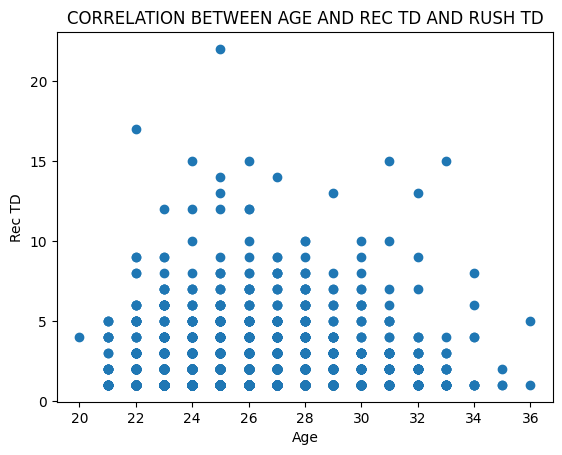

In [118]:
from matplotlib import pyplot

# Plot runtimes in a scatterplot.
pyplot.title('CORRELATION BETWEEN AGE AND REC TD AND RUSH TD')
pyplot.xlabel('Age')
pyplot.ylabel('Rec TD')
pyplot.scatter(scoring_stats['Age'], scoring_stats['RecTD'])
pyplot.show()

In [119]:
correlation = scoring_stats['Age'].corr(scoring_stats['RecTD'])

print(f"Correlation between 'age' and 'rec td': {correlation}")


Correlation between 'age' and 'rec td': 0.04823252143966383


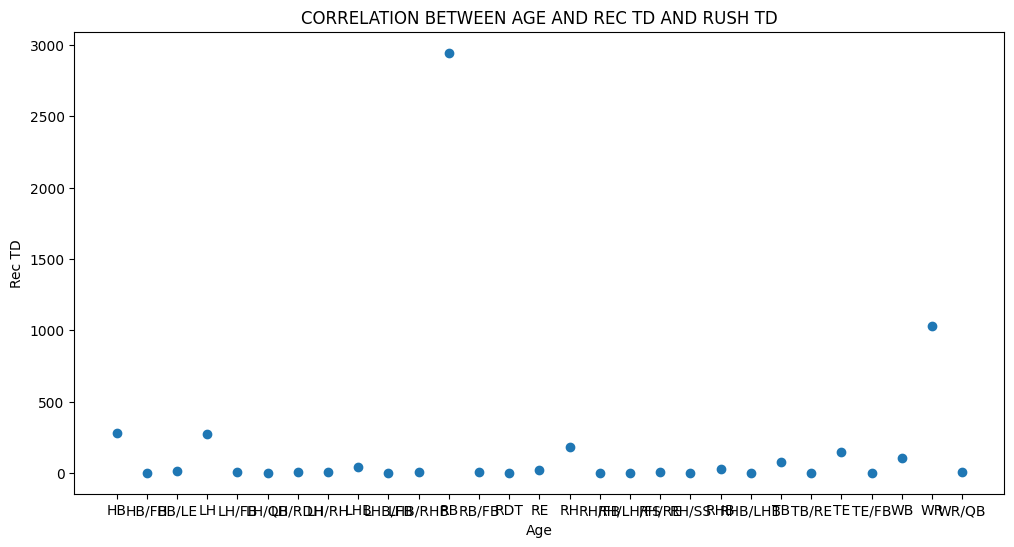

In [127]:
from matplotlib import pyplot

pyplot.figure(figsize=(12, 6))

# Plot runtimes in a scatterplot.
pyplot.title('CORRELATION BETWEEN AGE AND REC TD AND RUSH TD')
pyplot.xlabel('Age')
pyplot.ylabel('Rec TD')
pyplot.scatter(grouped_pos['Pos'], grouped_pos['RecTD'])
pyplot.show()